# Part B – Predictive Modelling

# I. Feature Engineering

In [2]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
# let us see what data available in our data directory
for direname, _ , filenames in os.walk("data"):
    for filename in filenames:
        print(os.path.join(direname, filename))

In [4]:
# load data
data_path = "zomato_df_final_data.csv"
df = pd.read_csv(data_path)
df.head()

address   cost  \
0                      371A Pitt Street, CBD, Sydney   50.0   
1      Shop 7A, 2 Huntley Street, Alexandria, Sydney   80.0   
2   Level G, The Darling at the Star, 80 Pyrmont ...  120.0   
3   Sydney Opera House, Bennelong Point, Circular...  270.0   
4              20 Campbell Street, Chinatown, Sydney   55.0   

                                       cuisine        lat  \
0   ['Hot Pot', 'Korean BBQ', 'BBQ', 'Korean'] -33.876059   
1  ['Cafe', 'Coffee and Tea', 'Salad', 'Poké'] -33.910999   
2                                 ['Japanese'] -33.867971   
3                        ['Modern Australian'] -33.856784   
4                            ['Thai', 'Salad'] -33.879035   

                                                link         lng  \
0    https://www.zomato.com/sydney/sydney-madang-cbd  151.207605   
1  https://www.zomato.com/sydney/the-grounds-of-a...  151.193793   
2        https://www.zomato.com/sydney/sokyo-pyrmont  151.195210   
3  https://www.zomato.com/sydney/bennelong-restau...  151.215297   
4  https://www.zomato.com/sydney/chat-thai-chinatown  151.206409   

          phone  rating_number rating_text  \
0  02 8318 0406            4.0   Very Good   
1  02 9699 2225            4.6   Excellent   
2  1800 700 700            4.9   Excellent   
3  02 9240 8000            4.9   Excellent   
4  02 8317 4811            4.5   Excellent   

                                 subzone                           title  \
0                                    CBD                   Sydney Madang   
1  The Grounds of Alexandria, Alexandria  The Grounds of Alexandria Cafe   
2                      The Star, Pyrmont                           Sokyo   
3                          Circular Quay            Bennelong Restaurant   
4                              Chinatown                       Chat Thai   

                     type   votes  groupon    color     cost_2 cuisine_color  
0       ['Casual Dining']  1311.0    False  #e15307   5.243902       #6f706b  
1                ['Café']  3236.0    False  #9c3203   7.560976       #6f706b  
2         ['Fine Dining']  1227.0    False  #7f2704  10.650407       #6f706b  
3  ['Fine Dining', 'Bar']   278.0    False  #7f2704  22.235772       #4186f4  
4       ['Casual Dining']  2150.0    False  #a83703   5.630081       #6f706b

In [5]:
# data shape
print(df.shape)
# column names
print(df.columns)

(10500, 17)
Index(['address', 'cost', 'cuisine', 'lat', 'link', 'lng', 'phone',
       'rating_number', 'rating_text', 'subzone', 'title', 'type', 'votes',
       'groupon', 'color', 'cost_2', 'cuisine_color'],
      dtype='object')


In [6]:
# summary of dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10500 entries, 0 to 10499
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   address        10500 non-null  object 
 1   cost           10154 non-null  float64
 2   cuisine        10500 non-null  object 
 3   lat            10308 non-null  float64
 4   link           10500 non-null  object 
 5   lng            10308 non-null  float64
 6   phone          10500 non-null  object 
 7   rating_number  7184 non-null   float64
 8   rating_text    7184 non-null   object 
 9   subzone        10500 non-null  object 
 10  title          10500 non-null  object 
 11  type           10452 non-null  object 
 12  votes          7184 non-null   float64
 13  groupon        10500 non-null  bool   
 14  color          10500 non-null  object 
 15  cost_2         10154 non-null  float64
 16  cuisine_color  10500 non-null  object 
dtypes: bool(1), float64(6), object(10)
memory usage: 1

In [7]:
# drop useless variables
df.drop(['address','lat','link','lng','phone','title','color','cuisine_color'],axis = 1, inplace = True)
df.head()

cost                                      cuisine  rating_number  \
0   50.0   ['Hot Pot', 'Korean BBQ', 'BBQ', 'Korean']            4.0   
1   80.0  ['Cafe', 'Coffee and Tea', 'Salad', 'Poké']            4.6   
2  120.0                                 ['Japanese']            4.9   
3  270.0                        ['Modern Australian']            4.9   
4   55.0                            ['Thai', 'Salad']            4.5   

  rating_text                                subzone                    type  \
0   Very Good                                    CBD       ['Casual Dining']   
1   Excellent  The Grounds of Alexandria, Alexandria                ['Café']   
2   Excellent                      The Star, Pyrmont         ['Fine Dining']   
3   Excellent                          Circular Quay  ['Fine Dining', 'Bar']   
4   Excellent                              Chinatown       ['Casual Dining']   

    votes  groupon     cost_2  
0  1311.0    False   5.243902  
1  3236.0    False   7.560976  
2  1227.0    False  10.650407  
3   278.0    False  22.235772  
4  2150.0    False   5.630081

In [8]:
# types of variables and categorical variables
categorical = [var for var in df.columns if df[var].dtype in ['O','bool']]

print("There are {} categorical variables\n".format(len(categorical)))
print("The categorical variables are: ", categorical)

There are 5 categorical variables

The categorical variables are:  ['cuisine', 'rating_text', 'subzone', 'type', 'groupon']


In [9]:
# check the target variable's na/null values
print(df.shape)
df = df[df['rating_number'].notna()]
print(df.shape)

(10500, 9)
(7184, 9)


In [10]:
# explore categorical variables
df[categorical].head()

cuisine rating_text  \
0   ['Hot Pot', 'Korean BBQ', 'BBQ', 'Korean']   Very Good   
1  ['Cafe', 'Coffee and Tea', 'Salad', 'Poké']   Excellent   
2                                 ['Japanese']   Excellent   
3                        ['Modern Australian']   Excellent   
4                            ['Thai', 'Salad']   Excellent   

                                 subzone                    type  groupon  
0                                    CBD       ['Casual Dining']    False  
1  The Grounds of Alexandria, Alexandria                ['Café']    False  
2                      The Star, Pyrmont         ['Fine Dining']    False  
3                          Circular Quay  ['Fine Dining', 'Bar']    False  
4                              Chinatown       ['Casual Dining']    False

In [11]:
# check missing variables
print(df[categorical].isnull().sum())
print("********\nPercentages of missing values\n********")
print(100 * df[categorical].isnull().sum() / df.shape[0])

cuisine         0
rating_text     0
subzone         0
type           21
groupon         0
dtype: int64
********
Percentages of missing values
********
cuisine        0.000000
rating_text    0.000000
subzone        0.000000
type           0.292316
groupon        0.000000
dtype: float64


In [12]:
# check which of these variables has missing values?
cat_with_missing = [var for var in categorical if df[var].isnull().sum() > 0]
print(df[cat_with_missing].isnull().sum())

type    21
dtype: int64


In [13]:
# get the frequency counts of the categorical variables
for var in categorical:
    print(df[var].value_counts())

['Cafe']                                                   1004
['Thai']                                                    420
['Chinese']                                                 284
['Modern Australian']                                       250
['Italian', 'Pizza']                                        217
                                                           ... 
['Pizza', 'Seafood', 'Modern Australian', 'Vegetarian']       1
['BBQ', 'Chinese', 'Hot Pot']                                 1
['Bakery', 'German']                                          1
['Steak', 'Modern Australian', 'Bar Food']                    1
['Fast Food', 'Burger', 'Coffee and Tea']                     1
Name: cuisine, Length: 1376, dtype: int64
Average      4501
Good         1917
Very Good     506
Poor          209
Excellent      51
Name: rating_text, dtype: int64
CBD                                         357
Surry Hills                                 227
Darlinghurst                        

In [14]:
# get the percentages in each of the categorical variables
for var in categorical:
    print(df[var].value_counts() / df.shape[0])

['Cafe']                                                   0.139755
['Thai']                                                   0.058463
['Chinese']                                                0.039532
['Modern Australian']                                      0.034800
['Italian', 'Pizza']                                       0.030206
                                                             ...   
['Pizza', 'Seafood', 'Modern Australian', 'Vegetarian']    0.000139
['BBQ', 'Chinese', 'Hot Pot']                              0.000139
['Bakery', 'German']                                       0.000139
['Steak', 'Modern Australian', 'Bar Food']                 0.000139
['Fast Food', 'Burger', 'Coffee and Tea']                  0.000139
Name: cuisine, Length: 1376, dtype: float64
Average      0.626531
Good         0.266843
Very Good    0.070434
Poor         0.029092
Excellent    0.007099
Name: rating_text, dtype: float64
CBD                                         0.049694
Surry Hills

In [15]:
import pandas as pd
from ast import literal_eval

# fill missing values with an empty list for 'cuisine' and 'type'
df['cuisine'] = df['cuisine'].apply(lambda x: [] if pd.isna(x) else x)
df['type'] = df['type'].apply(lambda x: [] if pd.isna(x) else x)

# remove rows with empty lists in 'cuisine' and 'type'
df = df[df['cuisine'].apply(len) > 0]
df = df[df['type'].apply(len) > 0]

# apply literal_eval and explode
df['cuisine'] = df['cuisine'].apply(literal_eval)
df['type'] = df['type'].apply(literal_eval)

df = df.explode('cuisine')
df = df.explode('type')
df.head()

cost     cuisine  rating_number rating_text  \
0  50.0     Hot Pot            4.0   Very Good   
0  50.0  Korean BBQ            4.0   Very Good   
0  50.0         BBQ            4.0   Very Good   
0  50.0      Korean            4.0   Very Good   
1  80.0        Cafe            4.6   Excellent   

                                 subzone           type   votes  groupon  \
0                                    CBD  Casual Dining  1311.0    False   
0                                    CBD  Casual Dining  1311.0    False   
0                                    CBD  Casual Dining  1311.0    False   
0                                    CBD  Casual Dining  1311.0    False   
1  The Grounds of Alexandria, Alexandria           Café  3236.0    False   

     cost_2  
0  5.243902  
0  5.243902  
0  5.243902  
0  5.243902  
1  7.560976

In [16]:
# check cardinality (number of unique labels) of each catogrical variable
for var in categorical:
    us = df[var].unique()
    print(var, ' contains ', len(us), ' labels.')

cuisine  contains  128  labels.
rating_text  contains  5  labels.
subzone  contains  520  labels.
type  contains  13  labels.
groupon  contains  2  labels.


In [17]:
# a function to explore each of the categorical variables
def explore_categorical(df, var):
    # check if the variable has any missing values
    print('********** missing values **********')
    print(df[var].isnull().sum())
    print('********** Labels **********')
    
    # check unique lables in variable
    print(df[var].unique())
    print('********** frequency **********')
    
    # check frequency of each variable
    print(df[var].value_counts())

In [18]:
explore_categorical(df, 'cuisine')

********** missing values **********
0
********** Labels **********
['Hot Pot' 'Korean BBQ' 'BBQ' 'Korean' 'Cafe' 'Coffee and Tea' 'Salad'
 'Poké' 'Japanese' 'Modern Australian' 'Thai' 'Desserts' 'Cantonese'
 'Chinese' 'Yum Cha' 'Sushi' 'Ramen' 'Malaysian' 'Taiwanese' 'Seafood'
 'Asian' 'Italian' 'Steak' 'French' 'Singaporean' 'European' 'Mexican'
 'Bar Food' 'American' 'Burger' 'Lebanese' 'Bakery' 'Grill' 'Pizza'
 'Vietnamese' 'Cuban' 'Latin American' 'Irish' 'Healthy Food' 'Australian'
 'Fusion' 'Patisserie' 'Juices' 'Vegetarian' 'Japanese BBQ' 'Spanish'
 'Dumplings' 'Indonesian' 'Indian' 'Tapas' 'Turkish' 'Vegan' 'Shanghai'
 'Tea' 'Caribbean' 'Sandwich' 'Fast Food' 'Middle Eastern' 'German'
 'Mediterranean' 'Pho' 'Greek' 'Beverages' 'Kebab' 'Fish and Chips'
 'Moroccan' 'Pakistani' 'Sri Lankan' 'Pub Food' 'Contemporary' 'Teriyaki'
 'Meat Pie' 'British' 'Brasserie' 'Belgian' 'Austrian' 'Hungarian' 'Swiss'
 'Charcoal Chicken' 'Brazilian' 'African' 'Israeli' 'Sichuan'
 'Street Food' 'Po

In [19]:
explore_categorical(df, 'rating_text')

********** missing values **********
0
********** Labels **********
['Very Good' 'Excellent' 'Good' 'Average' 'Poor']
********** frequency **********
Average      7865
Good         3761
Very Good    1060
Poor          395
Excellent     124
Name: rating_text, dtype: int64


In [20]:
explore_categorical(df, 'subzone')

********** missing values **********
0
********** Labels **********
['CBD' 'The Grounds of Alexandria, Alexandria' 'The Star, Pyrmont'
 'Circular Quay' 'Chinatown' 'Kensington Street, Chippendale'
 'Establishment, CBD' 'Surry Hills' 'The Rocks Centre, The Rocks '
 'Westfield Pitt Street Mall, CBD' 'The Rocks'
 'World Square Shopping Centre, CBD' 'Darling Park, Darling Harbour'
 'SkyView Shopping Plaza, CBD' 'Parramatta' 'Pyrmont'
 'Harbourside Shopping Centre, Darling Harbour' 'Ivy, CBD'
 'Regent Place Arcade, CBD' 'Newtown' 'The Galeries, CBD' 'Granville'
 'Potts Point' 'Woolloomooloo' 'Darling Harbour' 'Strathfield'
 'Darlinghurst' 'Wintergarden, CBD' 'Alexandria' 'Crows Nest'
 'Harbour Plaza, Chinatown' 'Westfield Chatswood, Chatswood' 'Ashfield'
 'Haberfield' 'Annandale' 'Chatswood' 'Chatswood Interchange, Chatswood'
 'The Strand Arcade, CBD' 'Glebe' 'Enmore' 'Redfern' 'Bronte'
 'Chippendale' 'Cabramatta' 'Rhodes' 'Icebergs, Bondi Beach' 'Bondi Beach'
 'Burwood' 'Macquarie Park' 'E

In [21]:
explore_categorical(df, 'type')

********** missing values **********
0
********** Labels **********
['Casual Dining' 'Café' 'Fine Dining' 'Bar' 'Dessert Parlour' 'Wine Bar'
 'Fast Food' 'Bakery' 'Food Court' 'Pub' 'Food Truck' 'Club'
 'Beverage Shop']
********** frequency **********
Casual Dining      6963
Café               3400
Bar                 866
Fast Food           488
Pub                 418
Food Court          390
Bakery              217
Fine Dining         161
Wine Bar            155
Dessert Parlour     114
Beverage Shop        12
Food Truck           11
Club                 10
Name: type, dtype: int64


In [22]:
explore_categorical(df, 'groupon')

********** missing values **********
0
********** Labels **********
[False  True]
********** frequency **********
False    13008
True       197
Name: groupon, dtype: int64


In [23]:
# find numerical variables
numerical = [var for var in df.columns if df[var].dtype not in ['O','bool']]
print("There are {} numerical variables:\n".format(len(numerical)))
print(numerical)
df[numerical].head()

There are 4 numerical variables:

['cost', 'rating_number', 'votes', 'cost_2']


cost  rating_number   votes    cost_2
0  50.0            4.0  1311.0  5.243902
0  50.0            4.0  1311.0  5.243902
0  50.0            4.0  1311.0  5.243902
0  50.0            4.0  1311.0  5.243902
1  80.0            4.6  3236.0  7.560976

In [24]:
# explore problems within numerical variables
# check missing values in numerical variables
df[numerical].isnull().sum()

cost             147
rating_number      0
votes              0
cost_2           147
dtype: int64

In [25]:
# view summary statistics in numerical variables
print(round(df[numerical].describe()), 2)

          cost  rating_number    votes   cost_2
count  13058.0        13205.0  13205.0  13058.0
mean      57.0            3.0     97.0      6.0
std       30.0            0.0    197.0      2.0
min       10.0            2.0      4.0      2.0
25%       40.0            3.0     13.0      4.0
50%       50.0            3.0     39.0      5.0
75%       70.0            4.0    104.0      7.0
max      500.0            5.0   3236.0     40.0 2


Text(0, 0.5, 'cost_2')

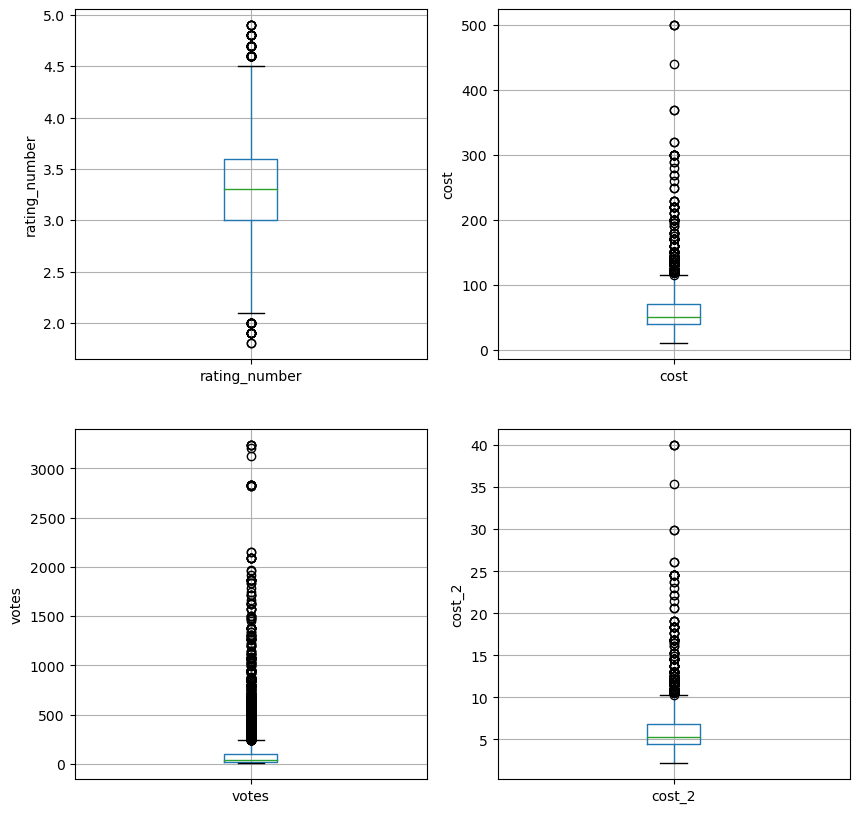

In [26]:
# draw boxplots to visualise outliers in these variables
plt.figure(figsize=(10, 10))

plt.subplot(2,2,1)
fig = df.boxplot(column= 'rating_number')
fig.set_title('')
fig.set_ylabel('rating_number')

plt.subplot(2,2,2)
fig = df.boxplot(column= 'cost')
fig.set_title('')
fig.set_ylabel('cost')

plt.subplot(2,2,3)
fig = df.boxplot(column= 'votes')
fig.set_title('')
fig.set_ylabel('votes')

plt.subplot(2,2,4)
fig = df.boxplot(column= 'cost_2')
fig.set_title('')
fig.set_ylabel('cost_2')

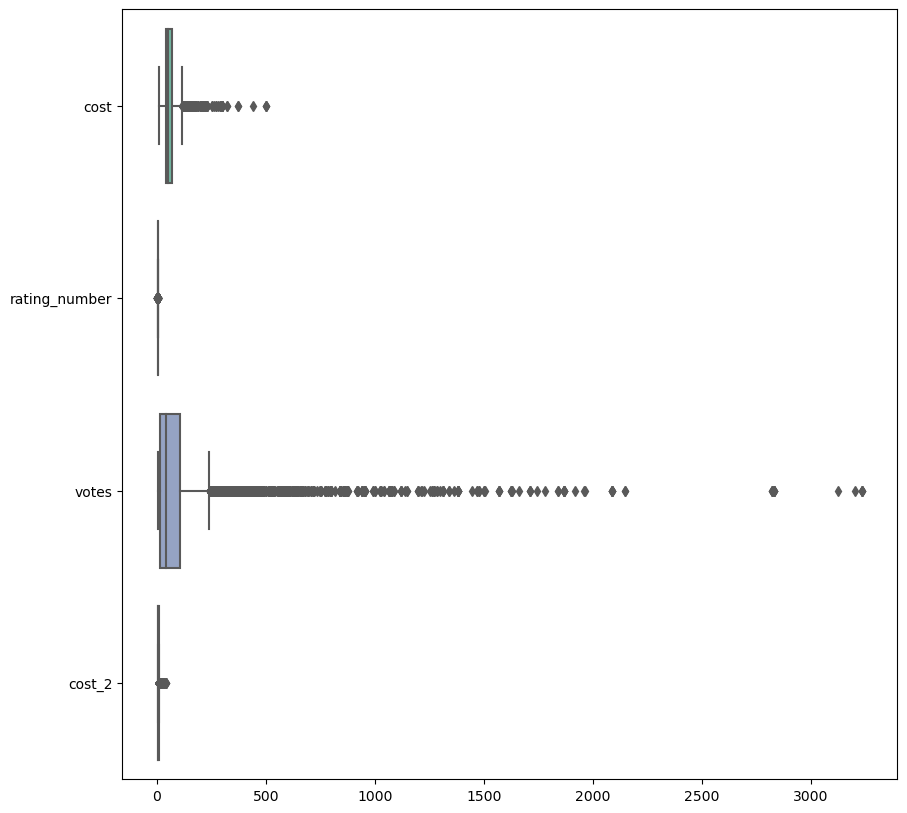

In [27]:
# use seaborn library to plot elegant ones
df_custom = df[['cost', 'rating_number', 'votes', 'cost_2']]
import seaborn as sns
plt.figure(figsize=(10, 10))
ax = sns.boxplot(data=df_custom, orient="h", palette="Set2")

Text(0, 0.5, 'rating_number')

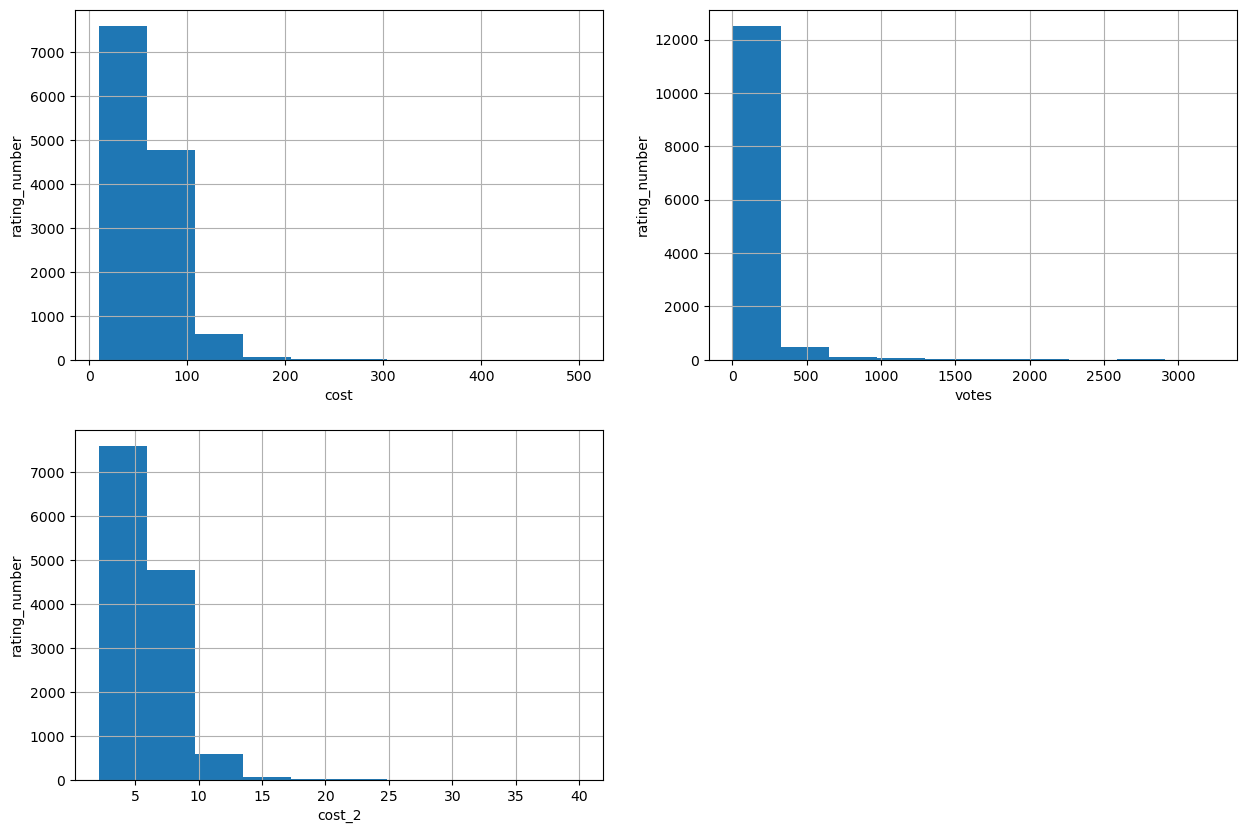

In [28]:
# plot histogram to check distribution
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
fig = df['cost'].hist(bins=10)
fig.set_xlabel('cost')
fig.set_ylabel('rating_number')

plt.subplot(2, 2, 2)
fig = df.votes.hist(bins=10)
fig.set_xlabel('votes')
fig.set_ylabel('rating_number')


plt.subplot(2, 2, 3)
fig = df.cost_2.hist(bins=10)
fig.set_xlabel('cost_2')
fig.set_ylabel('rating_number')

In [29]:
# find outliers in these variables
def find_outliers(variable, factor= 3, print_summary=True):
    
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    Lower_boundary = df[variable].quantile(0.25) - (IQR * factor)
    Upper_boundary = df[variable].quantile(0.75) + (IQR * factor)
    
    outliers= []
    for index, val in enumerate(df[variable]):
        if val < Lower_boundary or val > Upper_boundary:
            outliers.append(index)
    
    
    if(print_summary):
        print('{variable} outliers are values < {lowerboundary} or > {upperboundary}'.format(variable= variable, lowerboundary=Lower_boundary, upperboundary=Upper_boundary))
    return Lower_boundary, Upper_boundary, outliers

In [30]:
_,_,_ = find_outliers('cost')

cost outliers are values < -50.0 or > 160.0


In [31]:
_,_,_ = find_outliers('votes')

votes outliers are values < -260.0 or > 377.0


In [32]:
_,_,_ = find_outliers('rating_number')

rating_number outliers are values < 1.1999999999999997 or > 5.4


In [33]:
_,_,_ = find_outliers('cost_2')

cost_2 outliers are values < -2.4796747979999987 or > 13.739837398999999


In [34]:
X = df.drop(['rating_number'], axis=1)
y = df['rating_number']

In [35]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(10564, 8) (10564,)
(2641, 8) (2641,)


### Feature engineering

In [36]:
X_train.dtypes

cost           float64
cuisine         object
rating_text     object
subzone         object
type            object
votes          float64
groupon           bool
cost_2         float64
dtype: object

In [37]:
# display categorical variables
categorical = [var for var in X_train.columns if X_train[var].dtypes in ['O','bool']]
categorical

['cuisine', 'rating_text', 'subzone', 'type', 'groupon']

In [38]:
# display numerical variables
numerical = [var for var in X_train.columns if X_train[var].dtypes not in ['O','bool']]
numerical

['cost', 'votes', 'cost_2']

### Engineering missing values in numerical variables

In [39]:
# display missing values
X_train[numerical].isnull().sum()

cost      113
votes       0
cost_2    113
dtype: int64

In [40]:
# do the same for the text data
X_test[numerical].isnull().sum()

cost      34
votes      0
cost_2    34
dtype: int64

In [41]:
# percentage of missing values in each variable
round(X_train[numerical].isnull().mean(), 2)

cost      0.01
votes     0.00
cost_2    0.01
dtype: float64

In [42]:
# impute the missing values with the median values -- median is robust with the outliers
for df_temp in [X_train, X_test]:
    for col in numerical:
        col_median = X_train[col].median() # get it only from training
        df_temp[col].fillna(col_median, inplace=True)

In [43]:
# check again missing values in numerical variables in X_train
X_train[numerical].isnull().sum()

cost      0
votes     0
cost_2    0
dtype: int64

In [44]:
# check missing values in numerical variables in X_test
X_test[numerical].isnull().sum()

cost      0
votes     0
cost_2    0
dtype: int64

### Engineering missing values in categorical variables

In [45]:
round(X_train[categorical].isnull().mean(), 2)

cuisine        0.0
rating_text    0.0
subzone        0.0
type           0.0
groupon        0.0
dtype: float64

In [46]:
# impute missing categorical variables with most frequent value (i.e., mode)
for df_temp in [X_train, X_test]:
    for col in categorical:
        col_mode = X_train[col].mode()[0] # get it only from training
        df_temp[col].fillna(col_mode, inplace=True)

In [47]:
# check missing values in categorical variables in X_train
X_train[categorical].isnull().sum()

cuisine        0
rating_text    0
subzone        0
type           0
groupon        0
dtype: int64

In [48]:
# check missing values in categorical variables in X_test
X_test[categorical].isnull().sum()

cuisine        0
rating_text    0
subzone        0
type           0
groupon        0
dtype: int64

In [49]:
# replace the outliers with some predefined the maximum value for each variable
def max_value(df_temp, variable, top):
    return np.where(df_temp[variable]>top, top, df_temp[variable])

cols_with_outliers = {'cost': 160, 
                      'votes': 337, 
                      'cost_2': 13.7, 
                     }
for df_temp in [X_train, X_test]:
    for col in cols_with_outliers:
        df_temp[col] = max_value(df_temp, col, cols_with_outliers[col])

In [50]:
X_train.cost.max(), X_test.cost.max()

(160.0, 160.0)

In [51]:
X_train.votes.max(), X_test.votes.max()

(337.0, 337.0)

In [52]:
X_train.cost_2.max(), X_test.cost_2.max()

(13.7, 13.7)

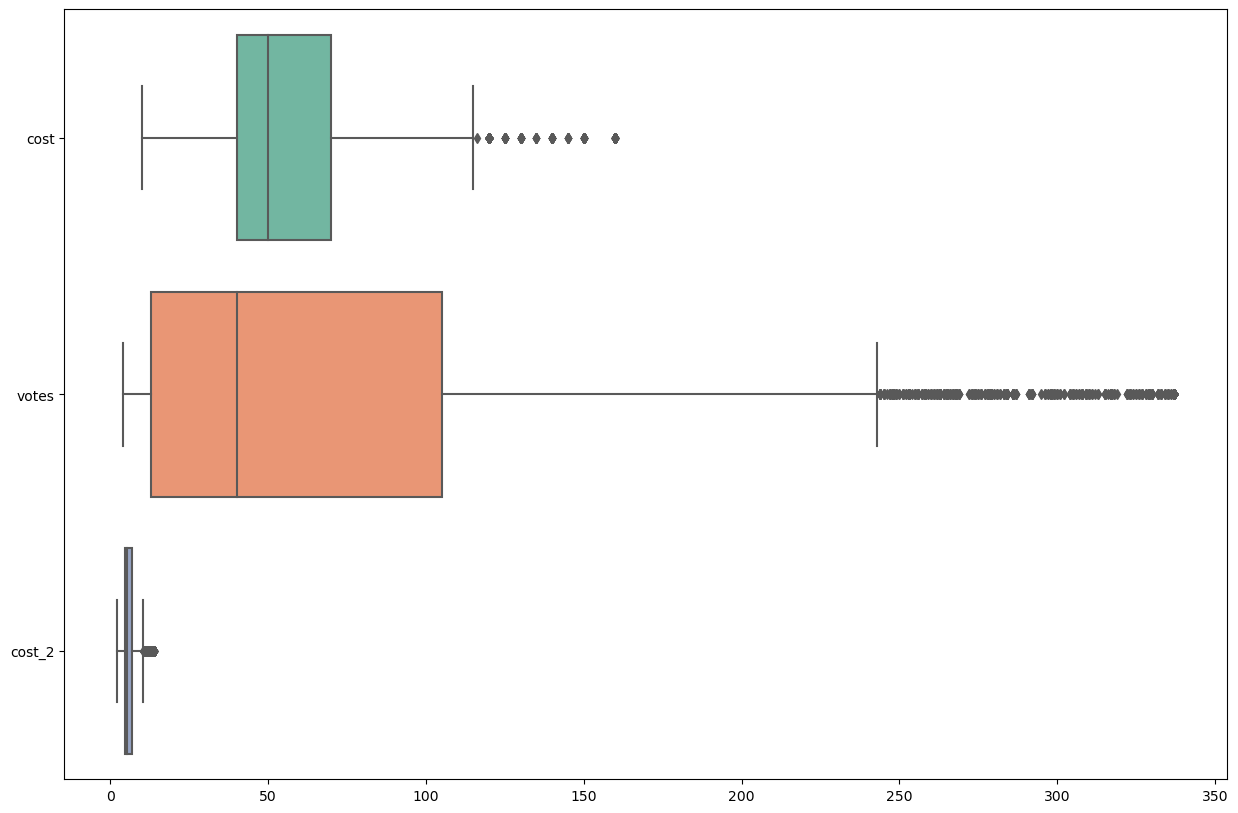

In [53]:
# use seaborn library to plot elegant ones
df_custom = X_train[['cost', 'votes', 'cost_2']]
import seaborn as sns
plt.figure(figsize=(15,10))
ax = sns.boxplot(data=df_custom, orient="h", palette="Set2")

## II. Regression:

In [54]:
X_train[categorical].head()

cuisine rating_text                    subzone           type  \
462   Modern Australian   Very Good                Chippendale  Casual Dining   
4825               Thai        Poor  Central Park, Chippendale     Food Court   
5485             Burger     Average               Mount Druitt            Bar   
5538               Thai        Good                    Padstow  Casual Dining   
1331               Cafe        Good                        CBD  Casual Dining   

      groupon  
462     False  
4825    False  
5485    False  
5538    False  
1331    False

In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder

# combine train and test data
combined_data = pd.concat([X_train, X_test])

# apply BinaryEncoder to the 'groupon' column
binary_encoder = ce.BinaryEncoder(cols=['groupon'])
combined_data = binary_encoder.fit_transform(combined_data)

# apply LabelEncoder to the categorical columns
categorical_columns = ['cuisine', 'type', 'subzone']
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    combined_data[col] = le.fit_transform(combined_data[col])
    label_encoders[col] = le

# split train and test data again
X_train = combined_data[:len(X_train)]
X_test = combined_data[len(X_train):]

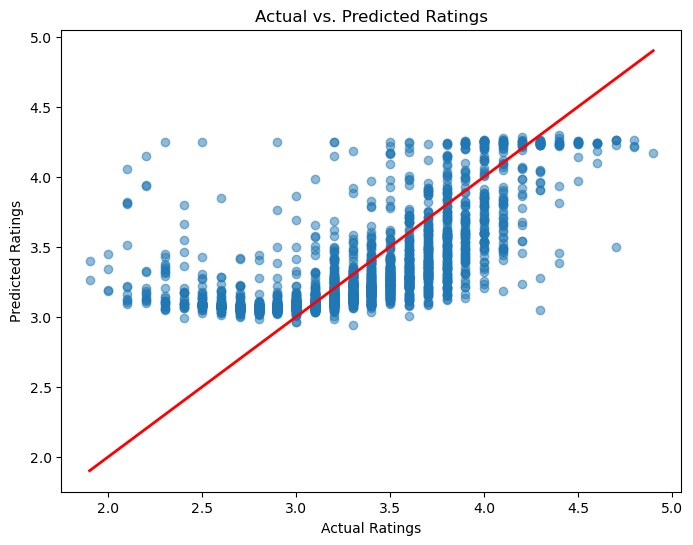

Mean Squared Error (MSE): 0.11474832210344575
R-squared (R2): 0.47594189861889336


In [56]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# create training set
X_train = pd.concat([X_train[numerical], X_train[['groupon_0', 'groupon_1']],
                     X_train[['cuisine', 'subzone', 'type']]], axis=1)
X_train.head()

# create test set
X_test = pd.concat([X_test[numerical], X_test[['groupon_0', 'groupon_1']],
                     X_test[['cuisine', 'subzone', 'type']]], axis=1)
X_test.head()

# store column names
cols = X_train.columns

# scale the features using Min-Max scaling
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# convert scaled data back to DataFrames
X_train = pd.DataFrame(X_train, columns=cols)
X_test = pd.DataFrame(X_test, columns=cols)

# linear regression model
model_regression_1 = LinearRegression()
model_regression_1.fit(X_train, y_train)

# make predictions on the test set
y_pred = model_regression_1.predict(X_test)

# create a scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)  # Scatter plot
plt.xlabel("Actual Ratings")  # X-axis label
plt.ylabel("Predicted Ratings")  # Y-axis label
plt.title("Actual vs. Predicted Ratings")  # Plot title

# add a diagonal line for reference (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)

plt.show()

# evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

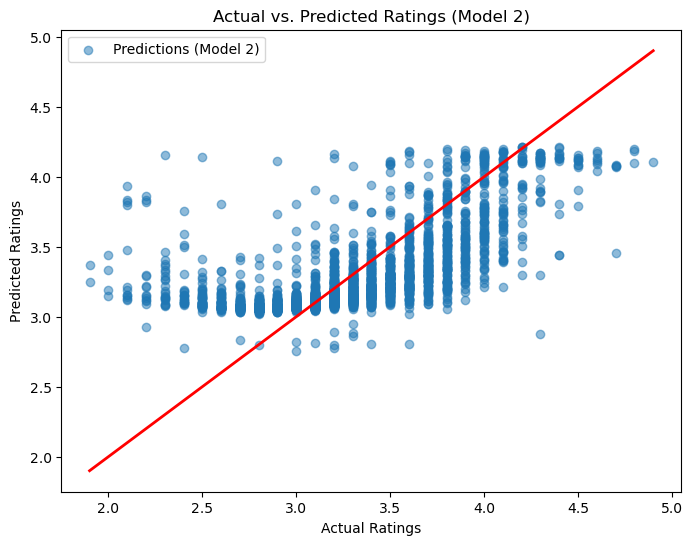

Model 2 (SGDRegressor) Metrics:
Mean Squared Error (MSE): 0.11863570247192393
Mean Absolute Error (MAE): 0.2553861315282429
R-squared (R2): 0.45818814729681023


In [57]:
from sklearn.linear_model import SGDRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  

# create and train a linear regression model using Gradient Descent with tuned hyperparameters
model_regression_2 = SGDRegressor(alpha=0.01, max_iter=10000, random_state=0) 
model_regression_2.fit(X_train, y_train)

# make predictions on the test set
y_pred_2 = model_regression_2.predict(X_test)

# evaluate the model's performance with additional metrics
mse = mean_squared_error(y_test, y_pred_2)
mae = mean_absolute_error(y_test, y_pred_2)  # Calculate Mean Absolute Error
r2 = r2_score(y_test, y_pred_2)

# create a customized scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_2, alpha=0.5, label="Predictions (Model 2)")  # Scatter plot
plt.xlabel("Actual Ratings")  # X-axis label
plt.ylabel("Predicted Ratings")  # Y-axis label
plt.title("Actual vs. Predicted Ratings (Model 2)")  # Plot title

# add a diagonal line for reference (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)

# add a legend
plt.legend()

plt.show()

# print additional evaluation metrics
print("Model 2 (SGDRegressor) Metrics:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")


# III.Classification:

In [59]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# define features (X) and target (y)
X = df.drop(['rating_text','rating_number'], axis=1)
y = (df['rating_text'].isin(['Good', 'Very Good', 'Excellent']))

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# encode categorical variables using one-hot encoding
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

# create and train a logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_encoded, y_train)

# predict on the test set
y_pred = model.predict(X_test_encoded)

# evaluate the model
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion)

class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Confusion Matrix:
[[1490  184]
 [ 173  794]]
Classification Report:
              precision    recall  f1-score   support

       False       0.90      0.89      0.89      1674
        True       0.81      0.82      0.82       967

    accuracy                           0.86      2641
   macro avg       0.85      0.86      0.85      2641
weighted avg       0.87      0.86      0.86      2641



# Conclusion:

Based on the confusion matrix and classification report of the logistic regression model, we can observe that:

The overall accuracy of the model is 0.86 (86%), which means that 86% of the test data samples were correctly classified.

Categorie 1('Poor' and 'Average') has an accuracy of 0.90, which indicates that when the model predicts a record as "poor" or "fair", it is correct in 90% of the cases.

Categorie 2('Good', 'Very Good', 'Excellent') has a precision of 0.81, which means that when the model predicts a record as "good," "very good," or "excellent," it is correct in 81% of the cases.

Furthermore, based on the recall rates of 0.89 and 0.82, it means that the model correctly identified 89% of the "Poor" and "Average" records and 82% of the "Good", "Very good" and "Excellent" records.

In conclusion, the model has an accuracy of 86%, indicating that it is effective in distinguishing records. Both categories have relatively high precision and recall values, indicating that both categories strike a good balance between recognizing positive and negative cases.